In [141]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import KFold
import seaborn as sas 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,fcluster
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn import metrics
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [142]:
#from google.colab import drive
#drive.mount('/content/drive')

In [143]:
# Import the CSV file
df = pd.read_csv("Merge_1.csv")
df.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,p_x,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season,crimeGroups
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,...,1193131.299,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn,1
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,...,1165825.476,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,8,27,Summer,3
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,...,1167659.235,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,9,27,Autumn,2
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,...,1164193.588,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn,2
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,...,1154575.242,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,4,27,Spring,1


In [144]:
df['ArrestLabel']=df['Arrest']
df.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season,crimeGroups,ArrestLabel
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,...,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn,1,1
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,...,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,8,27,Summer,3,1
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,...,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,9,27,Autumn,2,1
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,...,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn,2,1
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,...,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,4,27,Spring,1,0


In [145]:
#Dropping irrelevant columns
df=df.drop(columns=['Arrest'])

In [146]:
df.rename(columns={'ArrestLabel':'Arrest'},inplace=True)
df.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Domestic,...,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season,crimeGroups,Arrest
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,0,...,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn,1,1
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,0,...,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,8,27,Summer,3,1
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,0,...,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,9,27,Autumn,2,1
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,0,...,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn,2,1
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,1,...,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,4,27,Spring,1,0


In [147]:
#df=df.drop(columns=['IUCR','Beat','Ward','X Coordinate','Y Coordinate','Latitude','Longitude','p_x','p_y','p_latitude','p_longitude','Case Number','Block','FBI Code','Date','p_dname','Time'])
#For Crime Group
df_cgrp=df
df_cgrp=df_cgrp.drop(columns=['index','Beat','Ward','X Coordinate','Y Coordinate','p_x','p_y','p_latitude','p_longitude','Case Number','Block','FBI Code','Date','p_dname','Time'])
#For Arrest
df=df.drop(columns=['index','IUCR','Beat','Ward','X Coordinate','Y Coordinate','p_x','p_y','p_latitude','p_longitude','Case Number','Block','FBI Code','Date','p_dname','Time','Season'])

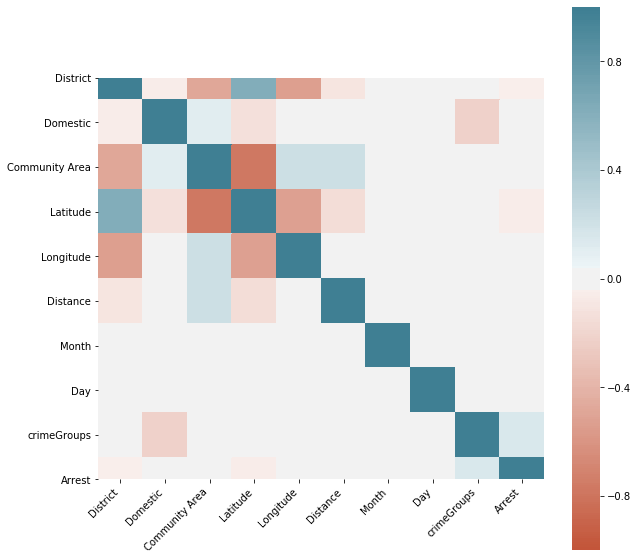

In [148]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [149]:
#Predicting Arrest
df=df.drop(columns=['Day','Month'])
#making dummy variables out of the object variables 
df_dum= pd.get_dummies(df)
df_dum.head()

,District,Domestic,Community Area,Latitude,Longitude,Distance,crimeGroups,Arrest,Primary Type_ARSON,Primary Type_ASSAULT,...,Location Description_VEHICLE - DELIVERY TRUCK,"Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",Location Description_VEHICLE NON-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS,Location Description_WAREHOUSE,Location Description_WOODED AREA,Location Description_YARD,Location Description_YMCA
0,4,0,51.0,41.721844,-87.585072,6822.245420,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,0,73.0,41.726124,-87.640913,14717.784521,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,69.0,41.770428,-87.628300,9500.832396,2,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,24,0,77.0,41.992509,-87.660344,3987.355350,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,66.0,41.765884,-87.693061,6432.894093,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485344 entries, 0 to 485343
Data columns (total 11 columns):
District                485344 non-null int64
Primary Type            485344 non-null object
Description             485344 non-null object
Location Description    485344 non-null object
Domestic                485344 non-null int64
Community Area          485344 non-null float64
Latitude                485344 non-null float64
Longitude               485344 non-null float64
Distance                485344 non-null float64
crimeGroups             485344 non-null int64
Arrest                  485344 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 40.7+ MB


In [216]:
X = df_dum.drop(columns=["crimeGroups","Arrest"])
y = df_dum[["crimeGroups","Arrest"]]
print(X.shape, y.shape)

(485344, 479) (485344, 2)


In [217]:
y.head()

,crimeGroups,Arrest
0,1,1
1,3,1
2,2,1
3,2,1
4,1,0


In [218]:
X.head()

,District,Domestic,Community Area,Latitude,Longitude,Distance,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,...,Location Description_VEHICLE - DELIVERY TRUCK,"Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",Location Description_VEHICLE NON-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS,Location Description_WAREHOUSE,Location Description_WOODED AREA,Location Description_YARD,Location Description_YMCA
0,4,0,51.0,41.721844,-87.585072,6822.245420,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,0,73.0,41.726124,-87.640913,14717.784521,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,69.0,41.770428,-87.628300,9500.832396,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24,0,77.0,41.992509,-87.660344,3987.355350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,66.0,41.765884,-87.693061,6432.894093,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
#Dividing the data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [220]:
print(X_train.shape)
print(y_train.shape)

(388275, 479)
(388275, 2)


In [221]:
print(y_train.head())

        crimeGroups  Arrest
47047             3       0
218820            3       0
152182            1       0
124793            2       0
144937            1       0


In [222]:
print(X_test.shape)
print(y_test.shape)

(97069, 479)
(97069, 2)


In [223]:
#Splitting the Training data into Train and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [224]:
print(X_val.shape)
print(y_val.shape)

(77655, 479)
(77655, 2)


In [237]:
# Standardize train and Validation set
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_train_scaled

array([[0.57564331, 0.        , 2.14997018, ..., 0.        , 0.        ,
        0.        ],
       [2.5903949 , 0.        , 0.37390786, ..., 0.        , 0.        ,
        0.        ],
       [0.43173248, 0.        , 2.00975473, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.29519745, 0.        , 2.75757045, ..., 0.        , 0.        ,
        0.        ],
       [3.45385987, 0.        , 0.09347696, ..., 0.        , 0.        ,
        0.        ],
       [0.86346497, 0.        , 3.31843223, ..., 0.        , 0.        ,
        0.        ]])

In [241]:
#Using Logistic Regression
classifier = LogisticRegression(solver="lbfgs",max_iter=1000)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
#fit (train) model with training data for Arrests
classifier.fit(x_train_scaled, y_train['Arrest'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
predictions = classifier.predict(x_val_scaled)

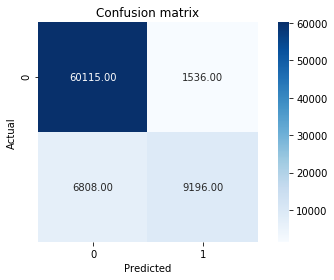

In [244]:
conf_matrix = metrics.confusion_matrix(y_val['Arrest'],predictions)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [245]:
accuracy = metrics.accuracy_score(y_val['Arrest'],predictions)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'],predictions)
recall = metrics.recall_score(y_val['Arrest'],predictions)
F1_score = metrics.f1_score(y_val['Arrest'],predictions,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.8925503831047582, 0.1074496168952418, 0.8568766306373462, 0.5746063484128968, 0.8841594443513132]


In [246]:
# Standardize train and Test set
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [247]:
#Final Model wiith Test Set
#Using Logistic Regression
classifier = LogisticRegression(solver="lbfgs",max_iter=1000)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
#fit (train) model with training data for Arrests
classifier.fit(x_train_scaled, y_train['Arrest'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [249]:
predictions = classifier.predict(x_test_scaled)

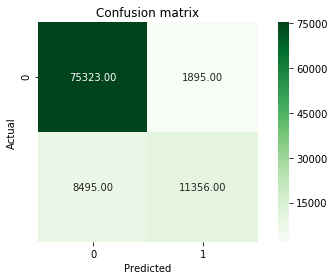

In [250]:
conf_matrix = metrics.confusion_matrix(y_test['Arrest'],predictions)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Greens)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [251]:
accuracy = metrics.accuracy_score(y_test['Arrest'],predictions)
error = 1 - accuracy
precision = metrics.precision_score(y_test['Arrest'],predictions)
recall = metrics.recall_score(y_test['Arrest'],predictions)
F1_score = metrics.f1_score(y_test['Arrest'],predictions,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.8929627378462743, 0.10703726215372567, 0.8569919251377255, 0.5720618608634326, 0.8844854349317147]


In [167]:
#Using Random Forest to build the model
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(x_train_scaled, y_train['Arrest'])
rf.score(x_val_scaled, y_val['Arrest'])

0.8815401455154208

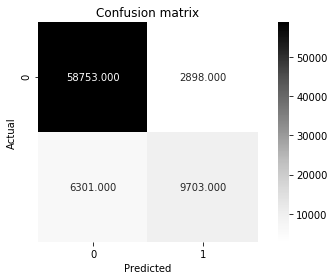

In [168]:
y_pred = rf.predict(x_val_scaled)
conf_matrix = metrics.confusion_matrix(y_val['Arrest'],y_pred)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Greys)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [169]:
accuracy = metrics.accuracy_score(y_val['Arrest'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'], y_pred)
recall = metrics.recall_score(y_val['Arrest'], y_pred)
F1_score = metrics.f1_score(y_val['Arrest'], y_pred,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.8815401455154208, 0.11845985448457919, 0.7700182525196413, 0.6062859285178706, 0.8760846217713733]


In [170]:
#-----------------Naive Bayes Classifier using different attributes --------------------
classifier = GaussianNB()  
classifier.fit(x_train_scaled,y_train['Arrest'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [171]:
y_pred = classifier.predict(x_val_scaled)

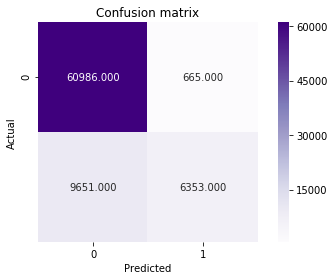

In [172]:
conf_matrix = metrics.confusion_matrix(y_val['Arrest'], y_pred)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Purples)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [173]:
accuracy = metrics.accuracy_score(y_val['Arrest'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'], y_pred)
recall = metrics.recall_score(y_val['Arrest'], y_pred)
F1_score = metrics.f1_score(y_val['Arrest'], y_pred,average='weighted')
print([accuracy, error, precision, recall, F1_score])

[0.8671560105595261, 0.13284398944047393, 0.9052436591621544, 0.3969632591852037, 0.8457419082834318]


In [252]:
#Using SMOTE to oversample the minority class data
smt = SMOTE()
X_train_s, y_train_s = smt.fit_sample(X_train, y_train['Arrest'])

In [253]:
np.bincount(y_train_s)

array([246390, 246390])

In [254]:
# Standardize train and Validation set
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_s)
x_train_scaled = scaler.transform(X_train_s)
x_val_scaled = scaler.transform(X_val)
x_train_scaled

array([[0.59691002, 0.        , 2.19317813, ..., 0.        , 0.        ,
        0.        ],
       [2.6860951 , 0.        , 0.38142228, ..., 0.        , 0.        ,
        0.        ],
       [0.44768252, 0.        , 2.05014477, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.04459254, 0.        , 3.24208941, ..., 0.        , 0.        ,
        0.        ],
       [2.6860951 , 0.        , 0.38142228, ..., 0.        , 0.        ,
        0.        ],
       [2.85930848, 0.56267244, 0.31685754, ..., 0.        , 0.        ,
        0.        ]])

In [201]:
#-----------------Naive Bayes Classifier after SMOTE --------------------
classifier = GaussianNB()  
classifier.fit(x_train_scaled,y_train_s)

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
y_pred = classifier.predict(x_val_scaled)

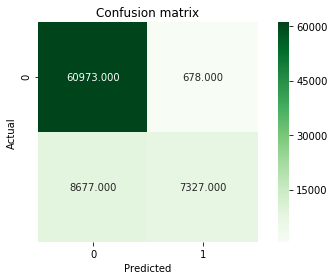

In [179]:
conf_matrix = metrics.confusion_matrix(y_val['Arrest'], y_pred)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Greens)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [180]:
accuracy = metrics.accuracy_score(y_val['Arrest'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'], y_pred)
recall = metrics.recall_score(y_val['Arrest'], y_pred)
F1_score = metrics.f1_score(y_val['Arrest'], y_pred,average='weighted')
print([accuracy, error, precision, recall, F1_score])

[0.8795312600605241, 0.12046873993947593, 0.9153029356652093, 0.45782304423894027, 0.8631327154922487]


In [255]:
#Using Logistic Regression for SMOTE
classifier = LogisticRegression(solver="lbfgs",max_iter=1000)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [256]:
#fit (train) model with training data for Arrests
classifier.fit(x_train_scaled, y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
predictions = classifier.predict(x_val_scaled)

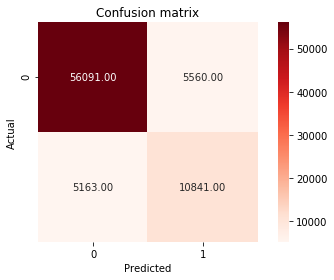

In [259]:
conf_matrix = metrics.confusion_matrix(y_val['Arrest'],predictions)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [260]:
accuracy = metrics.accuracy_score(y_val['Arrest'],predictions)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'],predictions)
recall = metrics.recall_score(y_val['Arrest'],predictions)
F1_score = metrics.f1_score(y_val['Arrest'],predictions,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.8619148799175842, 0.1380851200824158, 0.6609962807145906, 0.6773931517120719, 0.8625377169048841]


In [181]:
#Using Random Forest to build the model after SMOTE
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(x_train_scaled, y_train_s)
rf.score(x_val_scaled, y_val['Arrest'])

0.8777155366685983

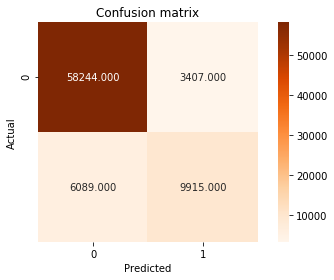

In [182]:
y_pred = rf.predict(x_val_scaled)
conf_matrix = metrics.confusion_matrix(y_val['Arrest'],y_pred)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [183]:
accuracy = metrics.accuracy_score(y_val['Arrest'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'], y_pred)
recall = metrics.recall_score(y_val['Arrest'], y_pred)
F1_score = metrics.f1_score(y_val['Arrest'], y_pred,average='weighted')
print([accuracy, error, precision, recall, F1_score])

[0.8777155366685983, 0.12228446333140175, 0.7442576189761297, 0.6195326168457885, 0.873425414683152]


In [261]:
#Undersampling majority class
nr = NearMiss()
X_train_m, y_train_m = nr.fit_sample(X_train, y_train['Arrest'])


In [262]:
np.bincount(y_train_m)

array([64230, 64230])

In [263]:
# Standardize train and Validation set
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_m)
x_train_scaled = scaler.transform(X_train_m)
x_val_scaled = scaler.transform(X_val)
x_train_scaled

array([[2.90930747, 0.        , 0.29116173, ..., 0.        , 0.        ,
        0.        ],
       [2.75618602, 0.        , 0.38821564, ..., 0.        , 0.        ,
        0.        ],
       [2.75618602, 0.        , 0.38821564, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.82803614, 0.        , 1.21317389, ..., 0.        , 0.        ,
        0.        ],
       [1.83745735, 0.        , 1.35875475, ..., 0.        , 0.        ,
        0.        ],
       [1.37809301, 0.        , 2.86309037, ..., 0.        , 0.        ,
        0.        ]])

In [264]:
#Using Logistic Regression for near miss
classifier = LogisticRegression(solver="lbfgs",max_iter=1000)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [265]:
#fit (train) model with training data for Arrests
classifier.fit(x_train_scaled, y_train_m)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [266]:
predictions = classifier.predict(x_val_scaled)

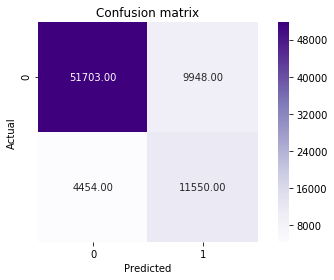

In [267]:
conf_matrix = metrics.confusion_matrix(y_val['Arrest'],predictions)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Purples)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [268]:
accuracy = metrics.accuracy_score(y_val['Arrest'],predictions)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'],predictions)
recall = metrics.recall_score(y_val['Arrest'],predictions)
F1_score = metrics.f1_score(y_val['Arrest'],predictions,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.8145386646062713, 0.18546133539372867, 0.537259279933017, 0.721694576355911, 0.8237990875820814]


In [187]:
#-----------------Naive Bayes Classifier after near Miss --------------------
classifier = GaussianNB()  
classifier.fit(x_train_scaled,y_train_m)

GaussianNB(priors=None, var_smoothing=1e-09)

In [188]:
y_pred = classifier.predict(x_val_scaled)

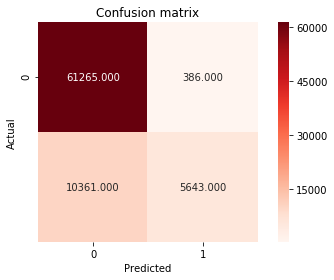

In [189]:
conf_matrix = metrics.confusion_matrix(y_val['Arrest'], y_pred)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [190]:
accuracy = metrics.accuracy_score(y_val['Arrest'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'], y_pred)
recall = metrics.recall_score(y_val['Arrest'], y_pred)
F1_score = metrics.f1_score(y_val['Arrest'], y_pred,average='weighted')
print([accuracy, error, precision, recall, F1_score])

[0.8616058206168309, 0.1383941793831691, 0.9359761154420302, 0.3525993501624594, 0.8354572178815222]


In [191]:
#Using Random Forest to build the model after Near Miss
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(x_train_scaled, y_train_m)
rf.score(x_val_scaled, y_val['Arrest'])

0.7307964715729831

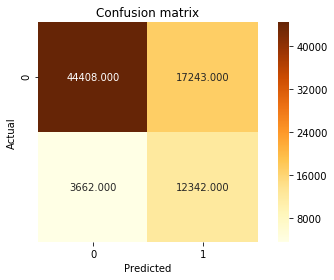

In [192]:
y_pred = rf.predict(x_val_scaled)
conf_matrix = metrics.confusion_matrix(y_val['Arrest'],y_pred)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".3f", square = True, cmap = plt.cm.YlOrBr)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [193]:
accuracy = metrics.accuracy_score(y_val['Arrest'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Arrest'], y_pred)
recall = metrics.recall_score(y_val['Arrest'], y_pred)
F1_score = metrics.f1_score(y_val['Arrest'], y_pred,average='weighted')
print([accuracy, error, precision, recall, F1_score])

[0.7307964715729831, 0.2692035284270169, 0.41717086361331757, 0.7711822044488877, 0.7542337652638942]


In [194]:
# Predicting for test set using Logistic Regression after near Miss
# Standardize train and Validation set
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_m)
x_train_scaled = scaler.transform(X_train_m)
x_test_scaled = scaler.transform(X_test)
x_train_scaled
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(x_train_scaled, y_train_m)
rf.score(x_test_scaled, y_test['Arrest'])

0.7347762931522938

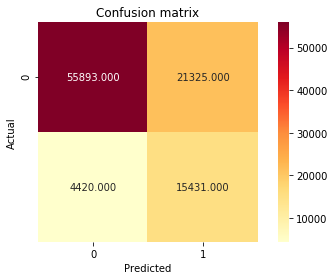

In [195]:
y_pred = rf.predict(x_test_scaled)
conf_matrix = metrics.confusion_matrix(y_test['Arrest'],y_pred)
sns.heatmap(conf_matrix,yticklabels=2, annot = True, fmt = ".3f", square = True, cmap = plt.cm.YlOrRd)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [101]:
accuracy = metrics.accuracy_score(y_test['Arrest'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test['Arrest'], y_pred)
recall = metrics.recall_score(y_test['Arrest'], y_pred)
F1_score = metrics.f1_score(y_test['Arrest'], y_pred,average='weighted')
print([accuracy, error, precision, recall, F1_score])

[0.7344878385478371, 0.26551216145216294, 0.41961667933543273, 0.7786509495743288]


In [269]:
df_cgrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485344 entries, 0 to 485343
Data columns (total 15 columns):
District                485344 non-null int64
IUCR                    485344 non-null object
Primary Type            485344 non-null object
Description             485344 non-null object
Location Description    485344 non-null object
Domestic                485344 non-null int64
Community Area          485344 non-null float64
Latitude                485344 non-null float64
Longitude               485344 non-null float64
Distance                485344 non-null float64
Month                   485344 non-null int64
Day                     485344 non-null int64
Season                  485344 non-null object
crimeGroups             485344 non-null int64
Arrest                  485344 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 55.5+ MB


In [270]:
#-------------------------Predicting Crime Group-------------------------------
#Predicting Arrest
df_cgrp=df_cgrp.drop(columns=['Primary Type','Day','Month'])
#making dummy variables out of the object variables 
df_cgrp_dum= pd.get_dummies(df_cgrp)
df_cgrp_dum.head()


,District,Domestic,Community Area,Latitude,Longitude,Distance,crimeGroups,Arrest,IUCR_0110,IUCR_0142,...,Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS,Location Description_WAREHOUSE,Location Description_WOODED AREA,Location Description_YARD,Location Description_YMCA,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,4,0,51.0,41.721844,-87.585072,6822.245420,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,22,0,73.0,41.726124,-87.640913,14717.784521,3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,0,69.0,41.770428,-87.628300,9500.832396,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,24,0,77.0,41.992509,-87.660344,3987.355350,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8,1,66.0,41.765884,-87.693061,6432.894093,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [271]:
X_cgrp = df_cgrp_dum.drop(columns=["crimeGroups","Arrest"])
y_cgrp = df_cgrp_dum[["crimeGroups"]]
print(X_cgrp.shape, y_cgrp.shape)

(485344, 869) (485344, 1)


In [272]:
#Dividing the data into Train and Test set
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cgrp,y_cgrp, test_size = 0.2, random_state=0)

In [273]:
print(X_train_c.shape)
print(y_train_c.shape)

(388275, 869)
(388275, 1)


In [274]:
print(X_test_c.shape)
print(y_test_c.shape)

(97069, 869)
(97069, 1)


In [275]:
#Splitting the Training data into Train and Validation set
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_c, y_train_c, test_size=0.2, random_state=1)

In [276]:
print(X_train_c.shape)
print(y_train_c.shape)

(310620, 869)
(310620, 1)


In [277]:
print(X_val_c.shape)
print(y_val_c.shape)

(77655, 869)
(77655, 1)


In [278]:
# Standardize train and Validation set
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_c)
x_train_scaled = scaler.transform(X_train_c)
x_val_scaled = scaler.transform(X_val_c)
x_train_scaled

array([[0.57564331, 0.        , 2.14997018, ..., 0.        , 2.1849634 ,
        0.        ],
       [2.5903949 , 0.        , 0.37390786, ..., 0.        , 0.        ,
        0.        ],
       [0.43173248, 0.        , 2.00975473, ..., 0.        , 2.1849634 ,
        0.        ],
       ...,
       [1.29519745, 0.        , 2.75757045, ..., 0.        , 0.        ,
        0.        ],
       [3.45385987, 0.        , 0.09347696, ..., 2.25695919, 0.        ,
        0.        ],
       [0.86346497, 0.        , 3.31843223, ..., 0.        , 2.1849634 ,
        0.        ]])

In [279]:
np.squeeze(y_train_c).shape

(310620,)

In [280]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(x_train_scaled, np.squeeze(y_train_c))
rf.score(x_val_scaled, y_val_c)

0.9996909406992467

In [281]:
y_pred_c = rf.predict(x_val_scaled)
print(f"First 10 Predictions:   {y_pred_c[:10]}")
print(f"First 10 Actual labels: {y_val_c[:10]}")


First 10 Predictions:   [4 1 1 2 2 3 1 3 1 3]
First 10 Actual labels:         crimeGroups
430036            4
263255            1
395129            1
180130            2
181342            2
410194            3
129723            1
28018             3
150122            1
318693            3


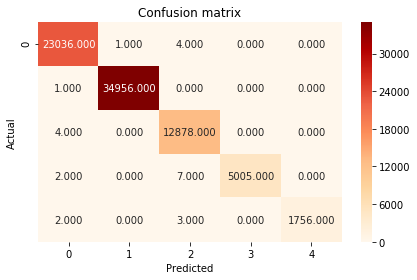

In [282]:
y_pred = rf.predict(x_val_scaled)
conf_matrix = metrics.confusion_matrix(y_val_c,y_pred_c)
sns.heatmap(conf_matrix,yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.OrRd)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [116]:
accuracy = metrics.accuracy_score(y_val_c, y_pred_c)
error = 1 - accuracy
precision = metrics.precision_score(y_val_c, y_pred_c,average='weighted')
recall = metrics.recall_score(y_val_c, y_pred_c,average='weighted')
F1_score = metrics.f1_score(y_val_c, y_pred_c,average='weighted')
print([accuracy, error, precision, recall, F1_score])

[0.9996007984031936, 0.0003992015968063978, 0.999600976573303, 0.9996007984031936]


In [117]:
# Random Forest Model fit on test set
#Standardize train and Test set
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_c)
x_train_scaled = scaler.transform(X_train_c)
x_test_scaled = scaler.transform(X_test_c)
x_train_scaled

array([[0.57564331, 0.        , 2.14997018, ..., 0.        , 2.1849634 ,
        0.        ],
       [2.5903949 , 0.        , 0.37390786, ..., 0.        , 0.        ,
        0.        ],
       [0.43173248, 0.        , 2.00975473, ..., 0.        , 2.1849634 ,
        0.        ],
       ...,
       [1.29519745, 0.        , 2.75757045, ..., 0.        , 0.        ,
        0.        ],
       [3.45385987, 0.        , 0.09347696, ..., 2.25695919, 0.        ,
        0.        ],
       [0.86346497, 0.        , 3.31843223, ..., 0.        , 2.1849634 ,
        0.        ]])

In [118]:
rf.score(x_test_scaled, y_test_c)

0.9995673180933151

In [119]:
y_pred_c = rf.predict(x_test_scaled)
print(f"First 10 Predictions:   {y_pred_c[:10]}")
print(f"First 10 Actual labels: {y_test_c[:10]}")

First 10 Predictions:   [2 2 2 2 2 1 3 2 2 2]
First 10 Actual labels:         crimeGroups
1869              2
334031            2
421823            2
435435            2
425940            2
431978            1
195397            3
248713            2
299268            2
305936            2


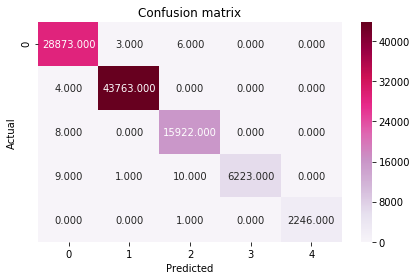

In [120]:
conf_matrix = metrics.confusion_matrix(y_test_c,y_pred_c)
sns.heatmap(conf_matrix,yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.PuRd)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [121]:
accuracy = metrics.accuracy_score(y_test_c, y_pred_c)
error = 1 - accuracy
precision = metrics.precision_score(y_test_c, y_pred_c,average='weighted')
recall = metrics.recall_score(y_test_c, y_pred_c,average='weighted')
F1_score = metrics.f1_score(y_test_c, y_pred_c,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.9995673180933151, 0.00043268190668488415, 0.9995675068315367, 0.9995673180933151]


In [122]:
#-----------------Naive Bayes Classifier for Crime group --------------------
classifier = GaussianNB()  
classifier.fit(x_train_scaled,np.squeeze(y_train_c))

GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
y_pred_c = classifier.predict(x_val_scaled)

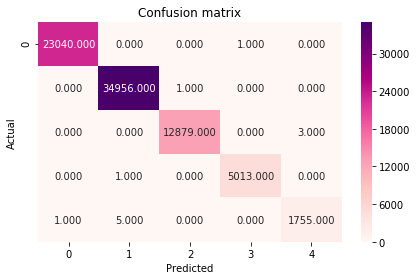

In [124]:
conf_matrix = metrics.confusion_matrix(y_val_c, y_pred_c)
sns.heatmap(conf_matrix,yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.RdPu)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [125]:
accuracy = metrics.accuracy_score(y_val_c, y_pred_c)
error = 1 - accuracy
precision = metrics.precision_score(y_val_c, y_pred_c,average='weighted')
recall = metrics.recall_score(y_val_c, y_pred_c,average='weighted')
F1_score = metrics.f1_score(y_val_c, y_pred_c,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.9998454703496233, 0.00015452965037665578, 0.9998454134742264, 0.9998454703496233]


In [126]:
#--------Predicting for Test set-----------------------------
y_pred_c = classifier.predict(x_test_scaled)

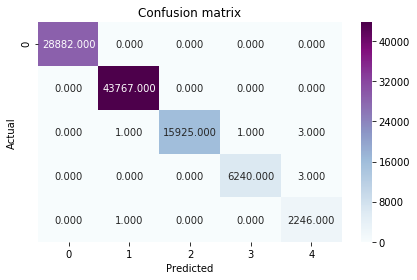

In [127]:
conf_matrix = metrics.confusion_matrix(y_test_c,y_pred_c)
sns.heatmap(conf_matrix,yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.BuPu)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [164]:
accuracy = metrics.accuracy_score(y_test_c, y_pred_c)
error = 1 - accuracy
precision = metrics.precision_score(y_test_c, y_pred_c,average='weighted')
recall = metrics.recall_score(y_test_c, y_pred_c,average='weighted')
F1_score = metrics.f1_score(y_test_c, y_pred_c,average='weighted')
print([accuracy, error, precision, recall,F1_score])

[0.9999072824485675, 9.271755143247518e-05, 0.9999074173260198, 0.9999072824485675, 0.9999073154126222]


In [129]:
#------------------------------------------Clustering-------------------------------------------#

In [130]:
df_cgrp['crimeGroups'].value_counts()

2    218069
1    144223
3     80236
4     31506
5     11310
Name: crimeGroups, dtype: int64

In [131]:
##X = df_dum.drop(columns=["crimeGroups","Arrest"])
#y = df_dum[["crimeGroups","Arrest"]]
print(X.shape, y.shape)
X_cgrp = df_cgrp_dum.drop(columns=["crimeGroups","Arrest","Distance","Latitude","Longitude","Season_Spring","Season_Autumn","Season_Summer","Season_Winter"])
y_cgrp = df_cgrp_dum[["crimeGroups"]]
print(X_cgrp.shape, y_cgrp.shape)

(485344, 479) (485344, 2)
(485344, 862) (485344, 1)


In [132]:
print(X_cgrp.shape, y_cgrp.shape)

(485344, 862) (485344, 1)


In [133]:
X_cgrp.head()

,District,Domestic,Community Area,IUCR_0110,IUCR_0142,IUCR_0261,IUCR_0262,IUCR_0263,IUCR_0264,IUCR_0265,...,Location Description_VEHICLE - DELIVERY TRUCK,"Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",Location Description_VEHICLE NON-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS,Location Description_WAREHOUSE,Location Description_WOODED AREA,Location Description_YARD,Location Description_YMCA
0,4,0,51.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,0,73.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,69.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24,0,77.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,66.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
scaler = StandardScaler(with_mean=False)
scaler.fit(X_cgrp)
x_scaled = scaler.transform(X_cgrp)
x_scaled

array([[0.57587815, 0.        , 2.38250255, ..., 0.        , 0.        ,
        0.        ],
       [3.16732981, 0.        , 3.41024874, ..., 0.        , 0.        ,
        0.        ],
       [1.00778676, 0.        , 3.2233858 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.00778676, 0.        , 3.12995433, ..., 0.        , 0.        ,
        0.        ],
       [0.71984768, 0.        , 2.28907107, ..., 0.        , 0.        ,
        0.        ],
       [0.86381722, 0.        , 3.2233858 , ..., 0.        , 0.        ,
        0.        ]])

In [135]:
clustering = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10,random_state=0).fit(x_scaled)
clusters = clustering.labels_

In [136]:
clusters[0:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [137]:
X_cgrp['clusters'] = clusters

In [138]:
X_cgrp['clusters'][0:5]

0    1
1    1
2    1
3    1
4    1
Name: clusters, dtype: int32

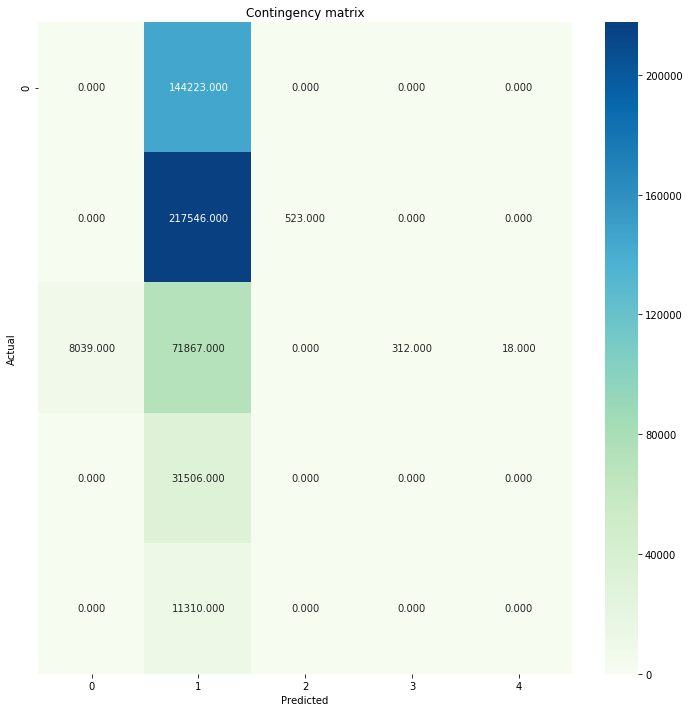

In [139]:
cont_matrix = metrics.cluster.contingency_matrix(y_cgrp['crimeGroups'],X_cgrp['clusters'])
fig, ax = plt.subplots(figsize=(10,10))  
ax=sns.heatmap(cont_matrix,yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.GnBu)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [140]:
adjusted_rand_index = metrics.adjusted_rand_score(y_cgrp['crimeGroups'], X_cgrp['clusters'])
silhouette_coefficient = metrics.silhouette_score(x_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

KeyboardInterrupt: 

In [0]:
clustering = KMeans(n_clusters = 5,init = 'random', n_init = 40,random_state=0).fit(x_scaled)
clusters = clustering.labels_

In [29]:
clusters[0:5]

array([1, 1, 1, 3, 2], dtype=int32)

In [0]:
X_cgrp['clusters'] = clusters

In [31]:
X_cgrp['clusters'][0:5]

0    1
1    1
2    1
3    3
4    2
Name: clusters, dtype: int32

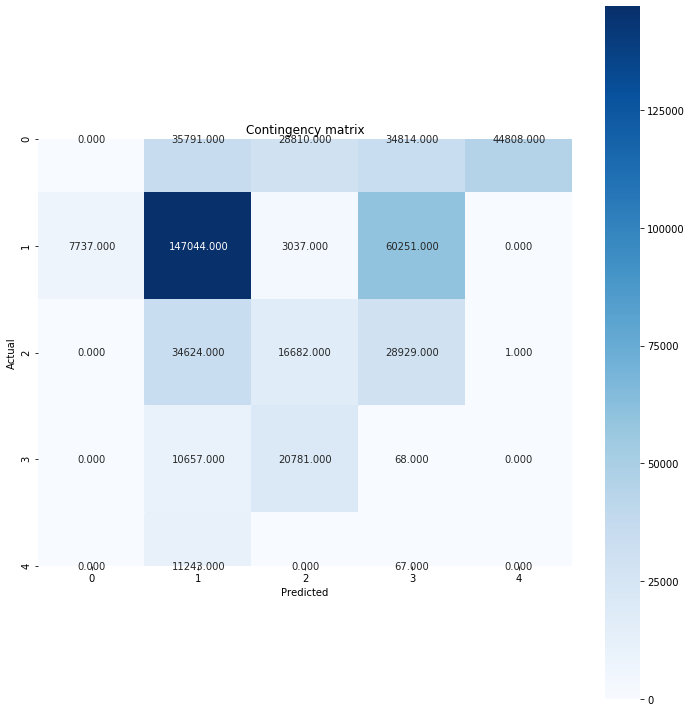

In [32]:
cont_matrix = metrics.cluster.contingency_matrix(y_cgrp['crimeGroups'],X_cgrp['clusters'])
fig, ax = plt.subplots(figsize=(10,10))  
ax=sns.heatmap(cont_matrix,yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.PuBu)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [33]:
adjusted_rand_index = metrics.adjusted_rand_score(y_cgrp['crimeGroups'], X_cgrp['clusters'])
silhouette_coefficient = metrics.silhouette_score(x_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

KeyboardInterrupt: ignored

In [0]:
hier = AgglomerativeClustering(n_clusters=5)
y_pred = hier.fit_predict(x_scaled)